# Project: TMDb movie data analysis (1960 - 2015)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb) from 1960 to 2015. 
  #### The columns in the dataset are:
>imdb_id - movie ID on TMDb               
popularity - movie popularity based on votes             
budget - budget to create the movie                
revenue - revenue from the movie              
original_title - title of the movie        
cast - original cast from the movie                  
homepage - movie website data              
director - the director of the movie              
tagline - marketing tagline for the movie               
keywords - keywords associated with the movie              
overview - summary of the movie plot              
runtime - duration of the movie              
genres - genre(s) represented by the movie                
production_companies - companies involved in the production of the movie  
release_date - movie release date         
vote_count - count of votes for the movie on TMDb            
vote_average - average of votes for the movie on TMDb           
release_year - movie release year        
budget_adj - the budget of the associated movie in terms of 2010 USD, accounting for inflation over time.           
revenue_adj - the revenue of the associated movie in terms of 2010 USD, accounting for inflation over time.       


### Questions for Analysis
>1. Which genres are most popular from year to year? 
2. What kinds of properties are associated with movies that have high revenues?

In [1]:
# Import packages for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, the data will be loaded, checked for cleanliness, trimmed and cleaned for analysis.

In [3]:
# Load the data and print out a few lines for inspection
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Get information on the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Computing some statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

In [6]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'production_companies', 'overview'], axis = 1, inplace = True)

Guided by the research questions, I dropped some of the columns in the dataset to allow for a more efficient and relevant result. For the next 2 code cells, I'll review the structure of the dataset after this modification

In [7]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


From the information above, the **genres** column has 23 null rows, we'll inspect them below

In [9]:
df[df.genres.isnull()]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


In [10]:
# dropping the 23 rows without genres 
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


After reviewing the **genres** column, I decided to drop the rows with null values as none of them had any revenue and all but one didn't have a budget so they won't be useful for my analysis.  

In [11]:
df_explode = df.assign(genres=df.genres.str.split("|")).explode('genres')
df_explode.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


From the earlier inspection of the data, the **genres** column contains multiple values separated by pipe (|) characters. I expanded the column and seperated the genres into unique rows for each movie. We'll explore the structure of the dataframe with the newly-added rows below

>**Code reference** - https://www.geeksforgeeks.org/convert-list-like-column-elements-to-separate-rows-in-pandas/

In [12]:
df_explode.shape

(26960, 12)

Some movies have no budget and revenue, they'll need to be dropped as they're not relevant to the analysis being conducted. 
Firstly, let's find out how many they are.
>NB: Going forward, I'll be using the columns with the adjusted values [ _adj ] for budget and revenue for my analysis

In [13]:
df_explode[df_explode['revenue_adj'] == 0].shape

(14291, 12)

In [14]:
df_explode[df_explode['budget_adj'] == 0].shape

(13354, 12)

In [15]:
#Dropping the rows with no revenue and creating a new dataframe

df_explode1 = df_explode[df_explode['revenue_adj'] != 0]
df_explode1.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,12669.000000,1.266900e+04,1.266900e+04,12669.000000,12669.000000,12669.000000,12669.000000,1.266900e+04,1.266900e+04
mean,1.117011,3.387511e+07,1.009431e+08,108.448260,482.341463,6.134478,2000.459468,4.029591e+07,1.295517e+08
std,1.489441,4.397130e+07,1.782994e+08,21.773857,870.835931,0.788794,11.560362,4.711258e+07,2.159184e+08
min,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.409695,3.000000e+06,9.500000e+06,95.000000,51.000000,5.600000,1993.000000,4.466253e+06,1.320481e+07
50%,0.718275,1.900000e+07,3.561010e+07,105.000000,165.000000,6.200000,2003.000000,2.500000e+07,5.072428e+07
75%,1.278646,4.800000e+07,1.132801e+08,118.000000,493.000000,6.700000,2010.000000,5.824944e+07,1.526289e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


From the data above, the minimum value in the **revenue_adj** column is no longer 0

In [16]:
#Dropping the rows with no budget

df_explode1 = df_explode1[df_explode1['budget_adj'] != 0]
df_explode1.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10308.000000,1.030800e+04,1.030800e+04,10308.000000,10308.000000,10308.000000,10308.000000,1.030800e+04,1.030800e+04
mean,1.261817,4.163404e+07,1.196152e+08,109.560050,573.866705,6.155539,2000.926271,4.952550e+07,1.516710e+08
std,1.607322,4.531340e+07,1.922780e+08,20.352987,940.256114,0.789914,11.276386,4.765383e+07,2.323826e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.477036,1.100000e+07,1.479624e+07,96.000000,76.000000,5.700000,1995.000000,1.554024e+07,2.037579e+07
50%,0.843159,2.529250e+07,5.045131e+07,106.000000,225.000000,6.200000,2004.000000,3.448528e+07,6.819704e+07
75%,1.460883,5.700000e+07,1.410472e+08,119.000000,631.000000,6.700000,2010.000000,6.956016e+07,1.825920e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


From the data above, the minimum value in the **budget_adj** column is no longer 0

In [17]:
# Explore the shape of the new dataframe

df_explode1.shape

(10308, 12)

In [18]:
# Explore the number of duplicate rows

sum(df_explode1.duplicated())

5

In [19]:
# Drop the duplicate rows
df_explode1.drop_duplicates(inplace = True)

#after removing duplicate value from the dataset
df_explode1.shape

(10303, 12)

The 5 duplicate rows have now been dropped
>Code reference - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

In [20]:
# Converting the date in the dataset from string to datetime format

df_explode1['release_date'] = pd.to_datetime(df_explode1['release_date'])
df_explode1['release_date'].head()

0   2015-06-09
0   2015-06-09
0   2015-06-09
0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]

I continued the Data Cleaning process by removing the duplicate rows in the data and changing the type of the given date in the dataset to the datetime format
> Code reference - https://datatofish.com/strings-to-datetime-pandas/

In [21]:
# Preview of the dataframe after cleaning

df_explode1.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,124,Adventure,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,124,Science Fiction,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,124,Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='eda'></a>
## Exploratory Data Analysis


### Which genres are most popular from year to year?

In [22]:
# Display all the unique genres represented in the original dataset

unique_genres = list(df_explode1['genres'].unique())
unique_genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'Foreign',
 'TV Movie']

In [23]:
# Display the movie release years represented in the original dataset and sort them ascendingly

unique_release_years = list(df_explode1['release_year'].unique())
unique_release_years.sort()
unique_release_years

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

I displayed 2 lists showing the unique genres and release years represented in the original dataset. The **unique** function produces an array output, the **list** function was used to convert the output into a list

>Code reference - https://sparkbyexamples.com/pandas/pandas-find-unique-values-from-columns/

In [24]:
# Create a dataframe to analyse the most popular movie genres

# Dropping columns that aren't needed
mostpopular_df = df_explode1.drop(['budget', 'revenue', 'original_title', 'runtime', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis = 1)
mostpopular_df.head()

,popularity,genres,release_year
0,32.985763,Action,2015
0,32.985763,Adventure,2015
0,32.985763,Science Fiction,2015
0,32.985763,Thriller,2015
1,28.419936,Action,2015


In [25]:
# Computing the popularity of each genre using the mean of the popularity values 
# Group the dataset by release_year and genres
unique_genre_count = mostpopular_df.groupby(['release_year','genres'], as_index=False)['popularity'].mean()
unique_genre_count.head()

,release_year,genres,popularity
0,1960,Action,1.504538
1,1960,Adventure,1.872132
2,1960,Comedy,0.501564
3,1960,Drama,1.564871
4,1960,History,1.136943


> **Code references:** https://www.geeksforgeeks.org/pandas-groupby-and-computing-mean/
                         https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/

In [26]:
# To find the most popular genre of each year, 
# group the dataframe using the release year and max value of the popularity rating
max_unique_genre_count = unique_genre_count.groupby('release_year').agg({'popularity':'max'})
max_unique_genre_count.head()

,popularity
release_year,
1960,2.610362
1961,2.631987
1962,3.170651
1963,1.586280
1964,3.153791


>Code reference - https://www.geeksforgeeks.org/pandas-groupby-one-column-and-get-mean-min-and-max-values/

In [27]:
# Merging the dataframes - unique_genre_count & max_unique_genre_count - to form a new one

leading_genres_per_year = unique_genre_count.merge(max_unique_genre_count, how='inner', right_on='popularity', left_on='popularity')
leading_genres_per_year.head()

,release_year,genres,popularity
0,1960,Horror,2.610362
1,1960,Thriller,2.610362
2,1961,Animation,2.631987
3,1962,Thriller,3.170651
4,1963,Adventure,1.586280


The **leading_genres_per_year** dataframe now shows the most popular movie genre(s) per year using the max value in the **popularity** column for each genre in a given year
>Code reference for merging dataframes - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Now we display this information in a bar chat below

>Code references for the barchat - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

In [28]:
leading_genres_per_year

,release_year,genres,popularity
0,1960,Horror,2.610362
1,1960,Thriller,2.610362
2,1961,Animation,2.631987
3,1962,Thriller,3.170651
4,1963,Adventure,1.586280
5,1964,Action,3.153791
6,1964,Adventure,3.153791
7,1965,Thriller,1.910465
8,1966,Drama,0.485092
9,1967,Animation,2.550704


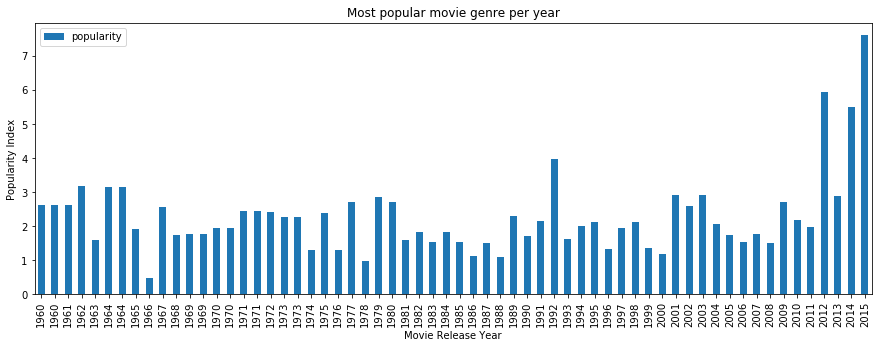

In [29]:
prominent_genre_plot = leading_genres_per_year.plot.bar(x='release_year', y='popularity',
                                        title='Most popular movie genre per year',
                                       figsize=(15,5),
                                        legend=True)
prominent_genre_plot.set(xlabel="Movie Release Year", ylabel="Popularity Index");

In [30]:
#Overall count of Movie genres for the period under review
leading_genres_per_year['genres'].value_counts()

Animation          15
Fantasy            10
Adventure           7
Family              5
Science Fiction     4
Thriller            4
Crime               3
War                 3
Action              3
Horror              2
Drama               2
Western             2
Music               1
Mystery             1
Name: genres, dtype: int64

This shows the number of years each genre topped the popularity rating during the period under review
>Code reference - https://www.geeksforgeeks.org/how-to-count-occurrences-of-specific-value-in-pandas-column/

### What kinds of properties are associated with movies that have high revenues?

In [31]:
#create a new dataframe showing profit, popularity, budget, revenue, runtime and genres
#for budget and revenue, we'll be using the adjusted values.

#drop unawanted columns from the df_explode1 dataframe to create the new dataframe
revenue_df = df_explode1.drop(['budget', 'revenue', 'original_title', 'release_date', 'vote_count', 'vote_average', 'release_year'], axis =1)

#creating a new column for profit using the revenue_adj and budget_adj columns
revenue_df['profit_adj'] = revenue_df['revenue_adj'] - revenue_df['budget_adj']

revenue_df.head()

,popularity,runtime,genres,budget_adj,revenue_adj,profit_adj
0,32.985763,124,Action,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,124,Adventure,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,124,Science Fiction,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,124,Thriller,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,120,Action,1.379999e+08,3.481613e+08,2.101614e+08


Code reference - https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

In [32]:
revenue_df.corr()

,popularity,runtime,budget_adj,revenue_adj,profit_adj
popularity,1.000000,0.209183,0.393667,0.546351,0.516834
runtime,0.209183,1.000000,0.322692,0.277536,0.234607
budget_adj,0.393667,0.322692,1.000000,0.561800,0.395958
revenue_adj,0.546351,0.277536,0.561800,1.000000,0.982108
profit_adj,0.516834,0.234607,0.395958,0.982108,1.000000


In [33]:
# group the genre 
revenue_df = revenue_df.groupby('genres', as_index =False).agg({'budget_adj':'sum','revenue_adj':'sum','profit_adj':'sum','popularity':'mean','runtime':'mean'})
revenue_df

,genres,budget_adj,revenue_adj,profit_adj,popularity,runtime
0,Action,7.209025e+10,2.119959e+11,1.399057e+11,1.567116,111.663594
1,Adventure,6.086054e+10,2.032842e+11,1.424237e+11,1.867693,112.615487
2,Animation,1.677790e+10,5.848243e+10,4.170453e+10,1.710622,89.228856
3,Comedy,5.320164e+10,1.647370e+11,1.115353e+11,1.012321,101.650957
4,Crime,2.598145e+10,7.186723e+10,4.588578e+10,1.123961,111.552995
5,Documentary,1.882896e+08,8.682158e+08,6.799262e+08,0.294458,101.428571
6,Drama,6.095509e+10,1.780206e+11,1.170655e+11,1.001411,115.906036
7,Family,3.021792e+10,1.036112e+11,7.339327e+10,1.459043,98.665882
8,Fantasy,3.177406e+10,9.899713e+10,6.722307e+10,1.754315,107.608586
9,Foreign,1.676771e+08,1.655391e+08,-2.138031e+06,0.179608,123.153846


In [34]:
# sort the revenue descendingly
revenue_df = revenue_df.sort_values(by='revenue_adj', ascending=False)

# represent the revenue, profit and budget in billion (USD)
revenue_df['revenue_adj'] =revenue_df['revenue_adj']/1000000000
revenue_df['profit_adj'] =revenue_df['profit_adj']/1000000000
revenue_df['budget_adj'] =revenue_df['budget_adj']/1000000000

revenue_df

,genres,budget_adj,revenue_adj,profit_adj,popularity,runtime
0,Action,72.090246,211.995913,139.905667,1.567116,111.663594
1,Adventure,60.860539,203.284194,142.423655,1.867693,112.615487
6,Drama,60.955086,178.020587,117.065501,1.001411,115.906036
3,Comedy,53.201639,164.736982,111.535343,1.012321,101.650957
17,Thriller,53.700527,154.317757,100.617231,1.258950,109.367940
15,Science Fiction,34.055339,104.917481,70.862142,1.873294,108.248555
7,Family,30.217922,103.611188,73.393265,1.459043,98.665882
8,Fantasy,31.774056,98.997130,67.223073,1.754315,107.608586
14,Romance,22.614172,75.717737,53.103565,0.954889,110.536732
4,Crime,25.981454,71.867233,45.885779,1.123961,111.552995


The **revenue_df** dataframe represents the movie genres sorted by their revenues for the period under review

We'll now represent the correlation between the **dependent variable: revenue** and the **independent variables: budget, profit and runtime** using scatter plots

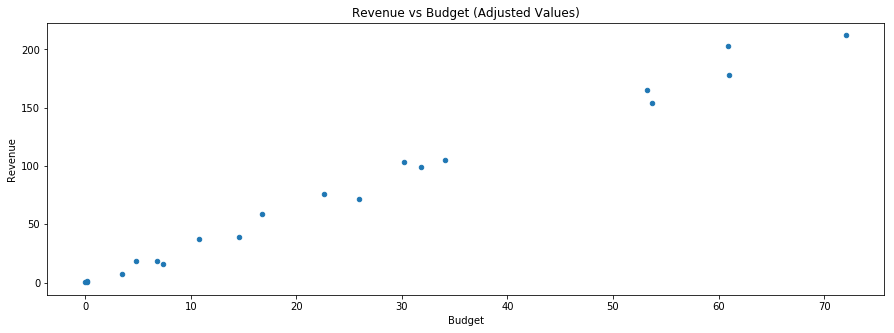

In [35]:
revenue_budget = revenue_df.plot.scatter(x='budget_adj', y='revenue_adj',
                                        title='Revenue vs Budget (Adjusted Values)',
                                       figsize=(15,5),
                                        legend=False)
revenue_budget.set(xlabel="Budget", ylabel="Revenue");

**Positive correlation between Revenue and Budget**


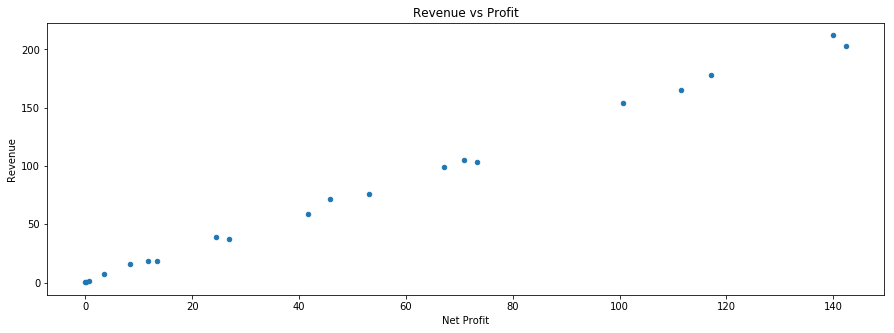

In [36]:
revenue_profit = revenue_df.plot.scatter(x='profit_adj', y='revenue_adj',
                                        title='Revenue vs Profit',
                                       figsize=(15,5),
                                        legend=True)
revenue_profit.set(xlabel="Net Profit", ylabel="Revenue");

**Positive correlation between Revenue and Profit**

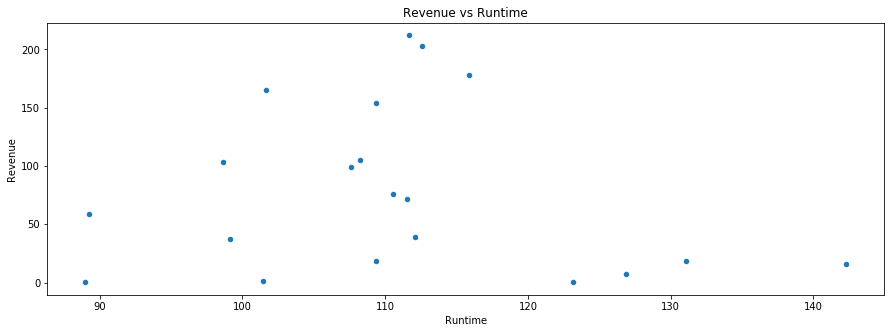

In [37]:
revenue_runtime = revenue_df.plot.scatter(x='runtime', y='revenue_adj',
                                        title='Revenue vs Runtime',
                                       figsize=(15,5),
                                        legend=True)
revenue_runtime.set(xlabel="Runtime", ylabel="Revenue");

**No correlation between Revenue and Runtime**

## Project - Update

Representation of the correlation between the dependent variable and the independent variables
> NB: **popularity** has been included among the independent variables under review
>Code Reference: https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/

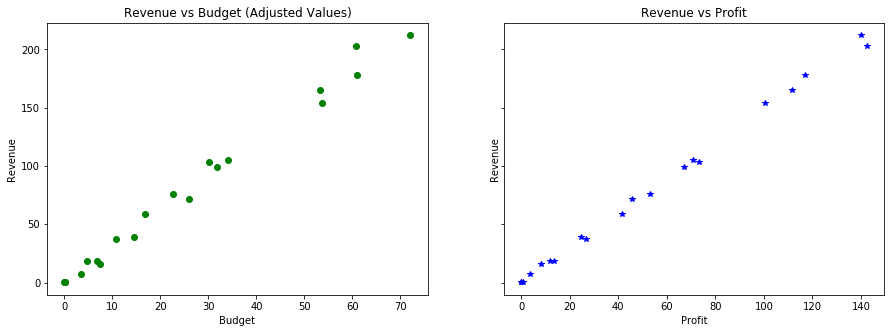

In [38]:
# Creating a figure and subplots for data visualisation
fig, (revenue_budget, revenue_profit) = plt.subplots(1,2, figsize=(15,5), sharey = True)

# Plot the diagram
revenue_budget.plot(revenue_df['budget_adj'], revenue_df['revenue_adj'], 'go')  # greendots
revenue_profit.plot(revenue_df['profit_adj'], revenue_df['revenue_adj'], 'b*')  # bluestars

# Label the axes
revenue_budget.set_title('Revenue vs Budget (Adjusted Values)'); revenue_profit.set_title('Revenue vs Profit');
revenue_budget.set_xlabel('Budget');  revenue_profit.set_xlabel('Profit'); # x label
revenue_budget.set_ylabel('Revenue');  revenue_profit.set_ylabel('Revenue'); # y label

plt.show()

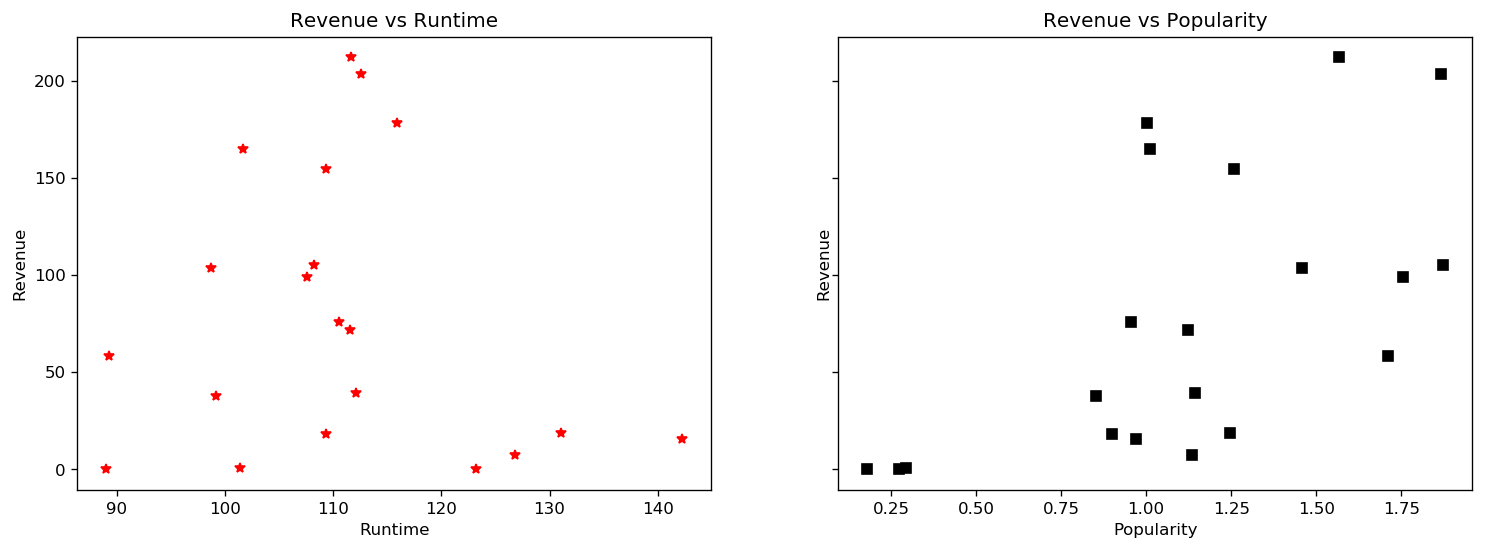

In [39]:
# Create Figure and Subplots
fig, (revenue_runtime, revenue_popularity) = plt.subplots(1,2, figsize=(15,5), sharey=True, dpi=120)

# Plot
revenue_runtime.plot(revenue_df['runtime'], revenue_df['revenue_adj'], 'r*')  # redstars
revenue_popularity.plot(revenue_df['popularity'], revenue_df['revenue_adj'], 'ks')  # blacksquares

# Title, X and Y labels, X and Y Lim
revenue_runtime.set_title('Revenue vs Runtime'); revenue_popularity.set_title('Revenue vs Popularity');
revenue_runtime.set_xlabel('Runtime');  revenue_popularity.set_xlabel('Popularity'); # x label
revenue_runtime.set_ylabel('Revenue');  revenue_popularity.set_ylabel('Revenue'); # y label

plt.show()

## Project - Update (II)

In [40]:
# Define a function to plot a scatterplot for 2 columns in a dataframe
def plot_columns(df, col1, col2):
    plot = df.plot.scatter(x= col1, y=col2,legend = True, figsize=(15,5))
    plot.set(xlabel=input("Enter your xlabel: "), ylabel=input("Enter your ylabel: "), title=input("Enter your Title: "))
    return plot

Enter your xlabel: Profit
Enter your ylabel: Revenue
Enter your Title: Revenue vs Profit (Adjusted Values)


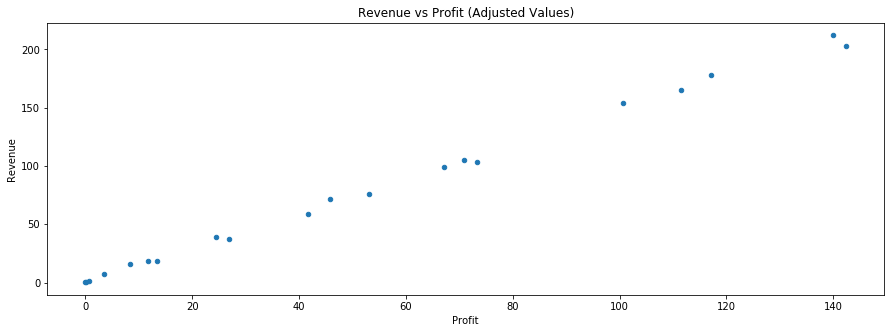

In [41]:
#Plotting a scatterplot to show the relationship between Revenue & Profit
# Copy the following to run the plot - 
# xlabel: Profit, ylabel: Revenue
# Title: Revenue vs Profit (Adjusted Values)
plot_columns(revenue_df, 'profit_adj', 'revenue_adj');

Enter your xlabel: Budget
Enter your ylabel: Revenue
Enter your Title: Revenue vs Budget (Adjusted Values)


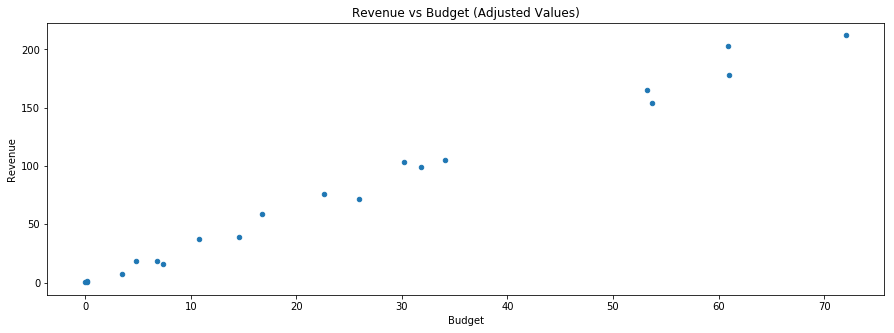

In [42]:
#Plotting a scatterplot to show the relationship between Revenue & Budget
# Copy the following to run the plot - 
# xlabel: Budget, ylabel: Revenue
#Title: Revenue vs Budget (Adjusted Values)
plot_columns(revenue_df, 'budget_adj', 'revenue_adj');

Enter your xlabel: Runtime
Enter your ylabel: Revenue
Enter your Title: Revenue vs Movie Runtime 


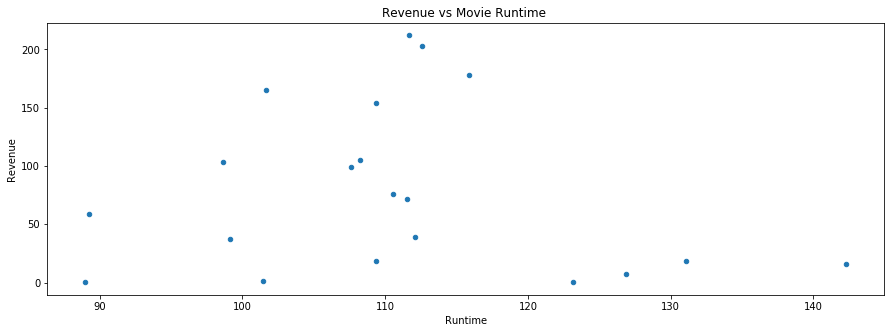

In [43]:
#Plotting a scatterplot to show the relationship between Revenue & Runtime
# Copy the following to run the plot -
# xlabel: Runtime, ylabel: Revenue
#Title: Revenue vs Movie Runtime 
plot_columns(revenue_df, 'runtime', 'revenue_adj');

Enter your xlabel: Popularity
Enter your ylabel: Revenue
Enter your Title: Revenue vs Popularity rating


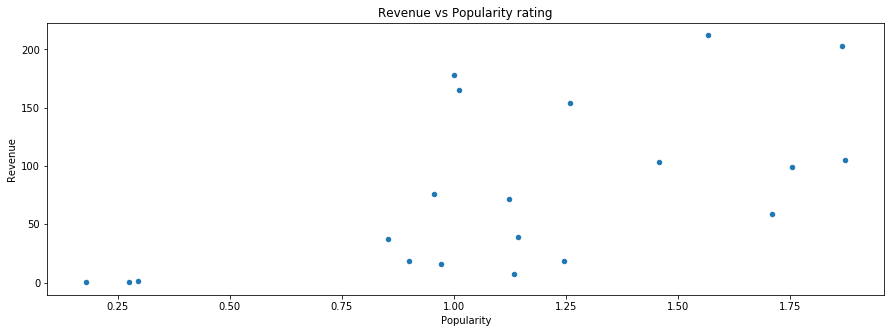

In [44]:
#Plotting a scatterplot to show the relationship between Revenue & Popularity rating
# Copy the following to run the plot -
# xlabel: Popularity, ylabel: Revenue
#Title: Revenue vs Popularity rating
plot_columns(revenue_df, 'popularity', 'revenue_adj');

<a id='conclusions'></a>
## Conclusions

### **Limitations**: 
>1. There were multiple rows with null values in the genres, budget and revenue columns.These null values had to be removed so as not to affect the final results.
>2. A significant number of the movies had multiple genres assigned to them
>3. Insufficient insight into the computation of the values in the vote_count and vote_average columns. If more insight is provided, the columns can be used for further investigation.

### **Findings**: 
>1. In 1960, we had 2 movie genres that were the most popular for the year, every other year under review, had only one top genre.
>2. The Animation and Fantasy genres topped most years under review.
>3. The most popular genre in 1966 - Drama, had the lowest popularity rating out of all the years reviewed while Science Fiction in 2015 had the higheset popularity rating. 
>4. Movies with higher revenues, tend to have higher popularity ratings, budgets and profits than those with lesser revenues.
>5. There was no correlation between revnue and movie runtime.

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0